In [1]:
from src.preprocess_utils.blood_data_preprocessing import load_blood_data
from src.preprocess_utils.clinical_data_preprocessing import load_clinical_data
from src.preprocess_utils.imaging_data_preprocessing import load_sparse_imaging_data

/home/anton/AdaLab/pharmaimage/src/preprocess_utils/clinical_data_preprocessing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["op0270_v2"][aneasth_nan] = np.nan
/home/anton/AdaLab/pharmaimage/src/preprocess_utils/clinical_data_preprocessing.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["surgeryDuration"][surgery_nan] = np.nan
/home/anton/AdaLab/pharmaimage/src/preprocess_utils/clinical_data_preprocessing.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Index(['Sex', 'Age', 'Height', 'Weight', 'MMSE',
       'Anaesthesia duration over 4h', 'localisation', 'ASA-PS',
       'Arterial hypertension', 'Coronary artery disease', 'NIDDM', 'IDDM',
       'History of TIA', 'History of stroke', 'longterm BDZ intake',
       'Barthel <100p', 'IADL <8p', 'history of falling', 'TUG',
       'Frailty (3 levels)', 'Conspicious AUDIT score', 'Smoking',
       'MNA-SF (3 levels)', 'Pack years', 'BMI',
       'Any uncontrolled pain until postoperative day 7', 'ISCED (3 levels)',
       'POD', 'POCD', 'Preop. cognitive impairment',
       'History of previous surgery', 'GDS score', 'CCI', 'Tumor*',
       'Surgery duration over 4h', 'EQ5D',
       'Any anticholinergic medication until postoperative day 7'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


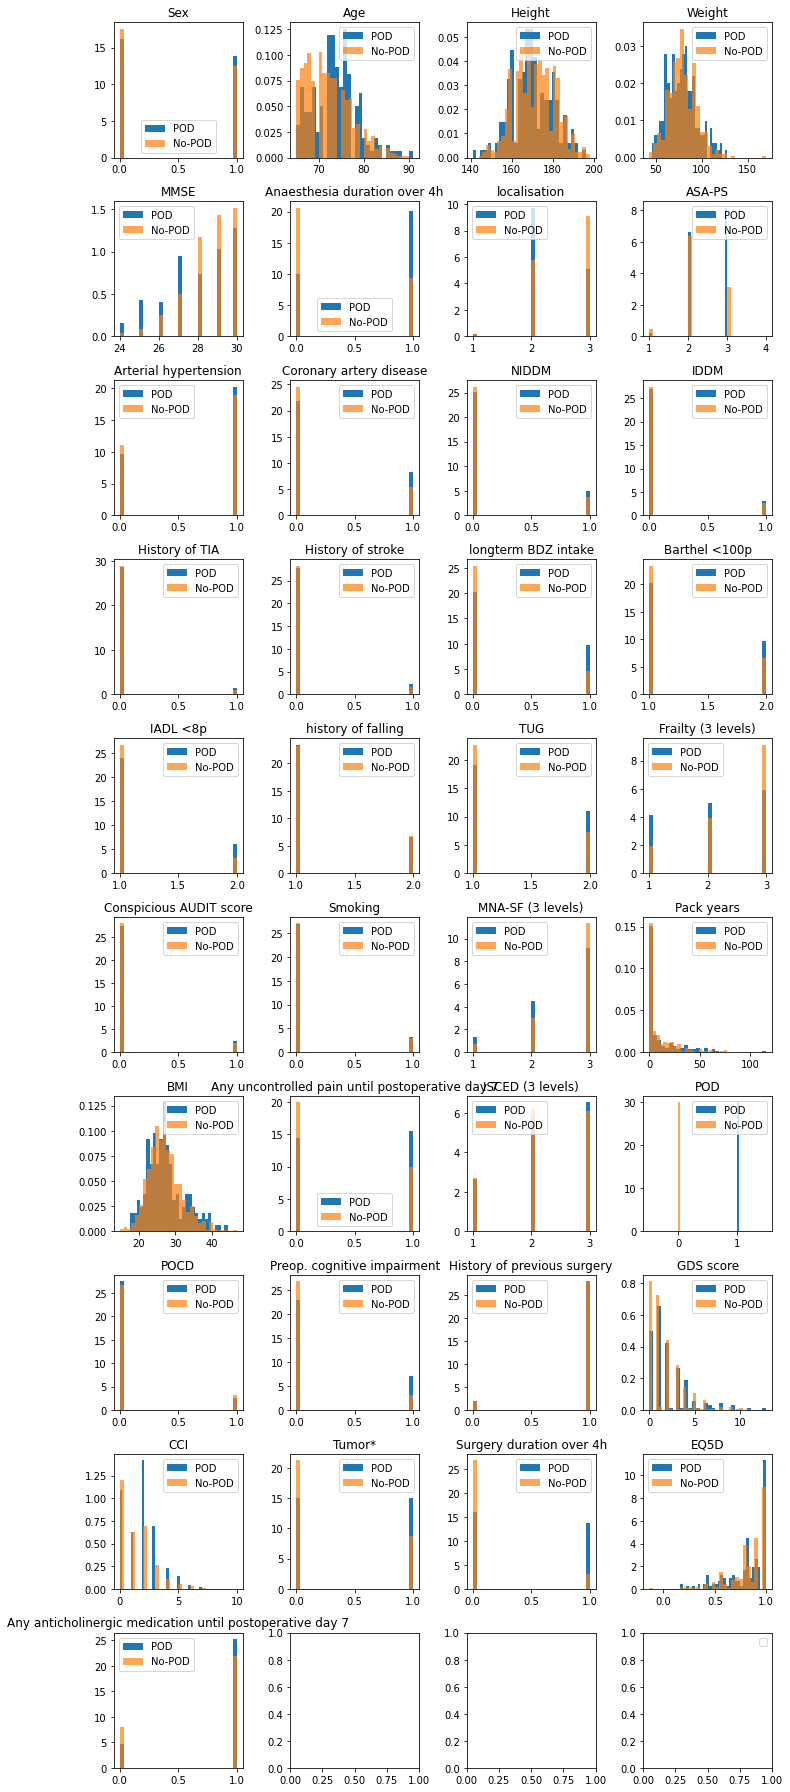

<Figure size 1440x1440 with 0 Axes>

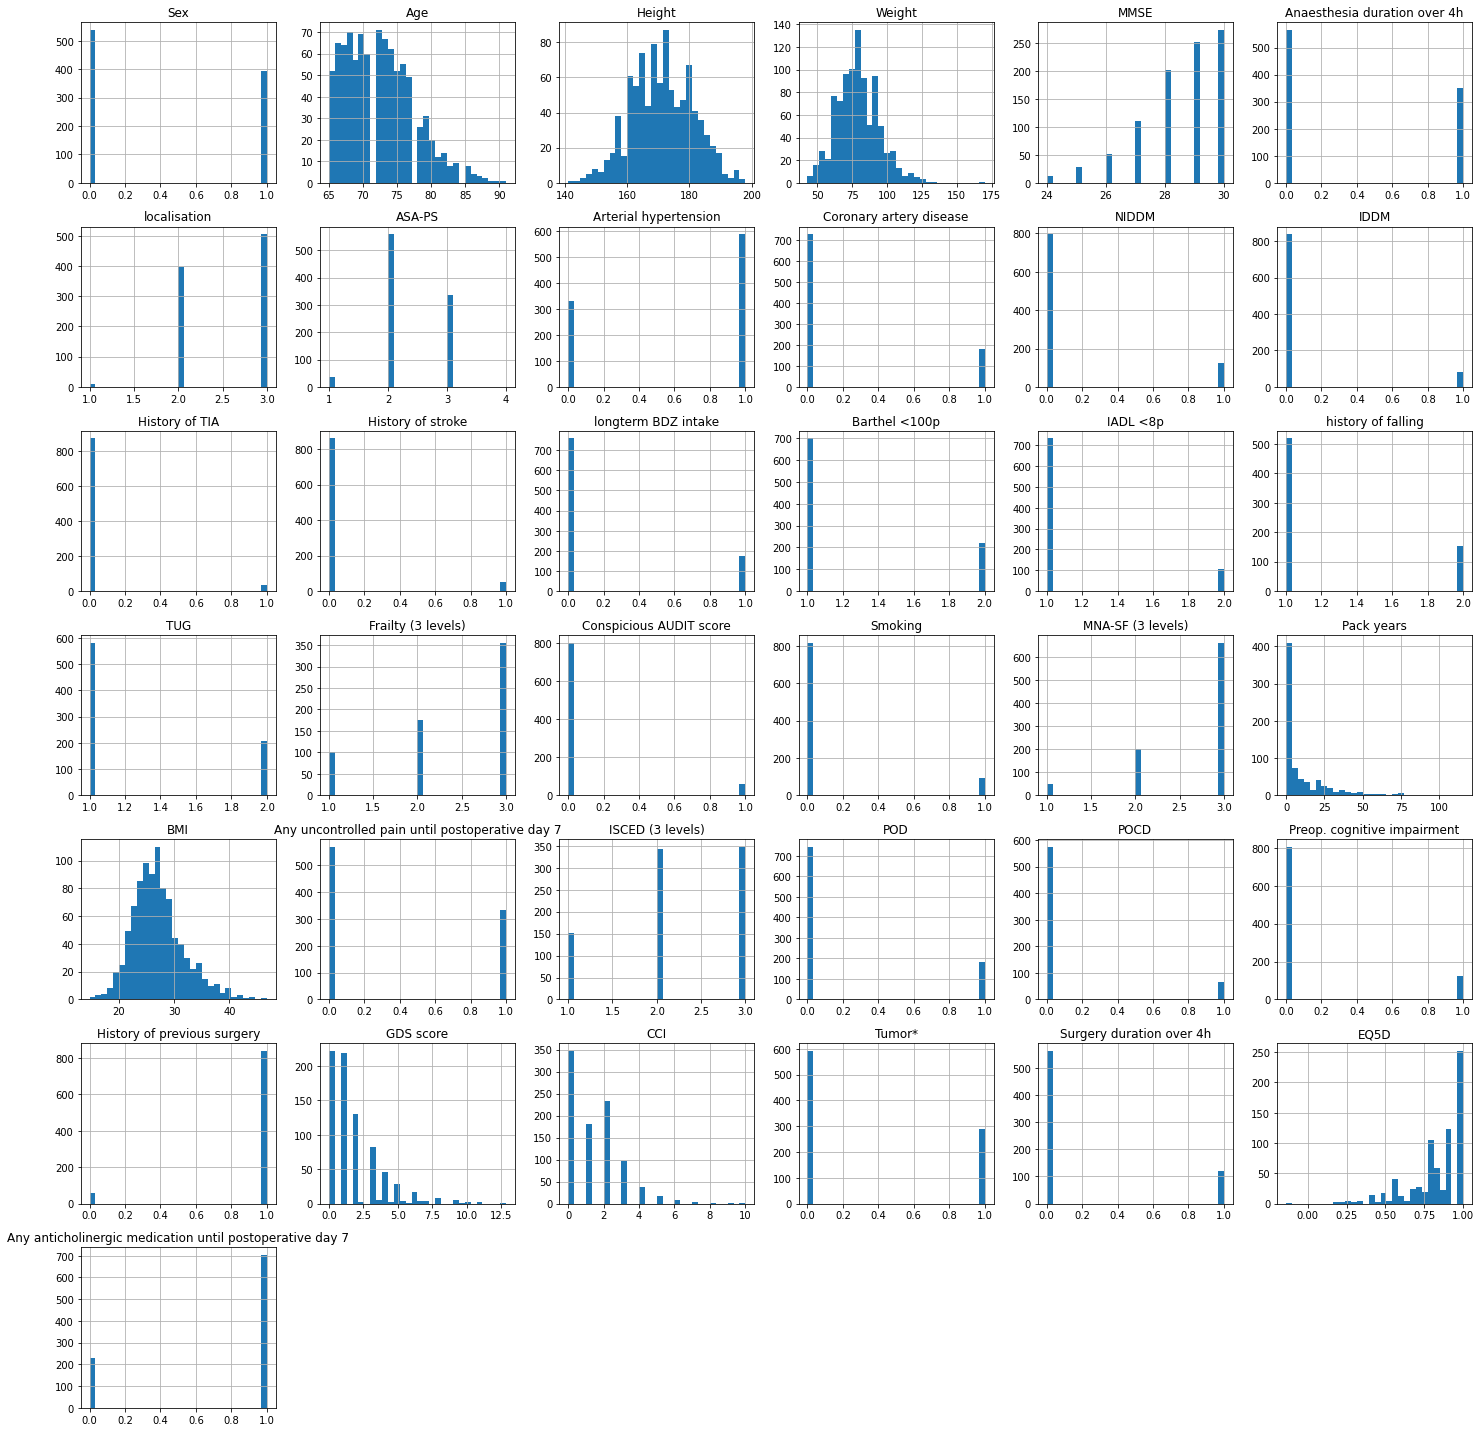

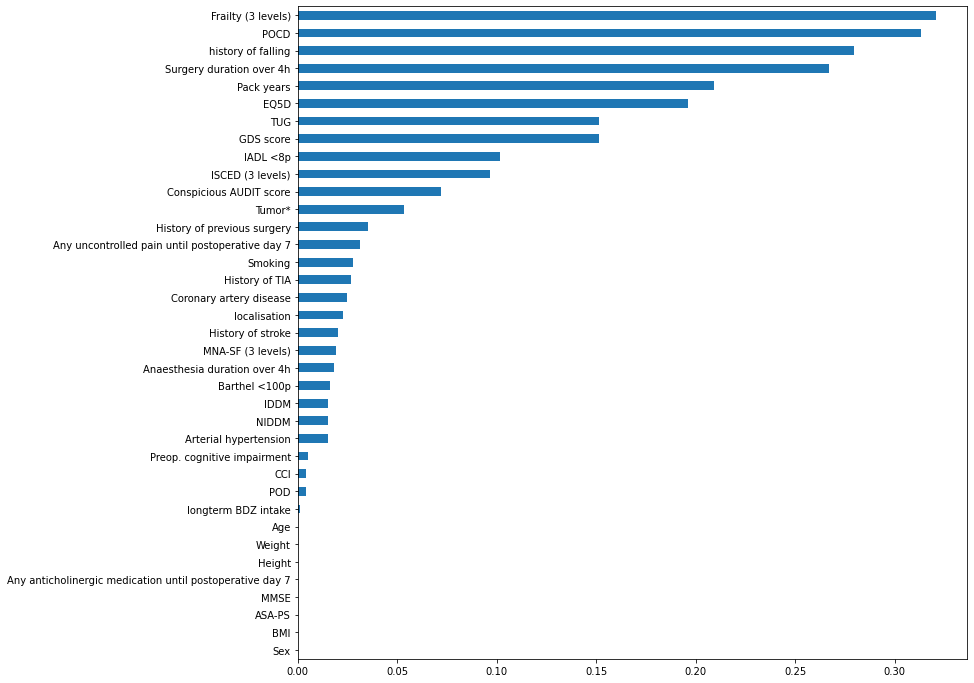

In [2]:
clinical_df = load_clinical_data("data", None, miss_feature=False, remove_precipitals=False, duration_threshold=4)
# put precipitants in own df
precipitants_to_drop = ["clinical_Surgery duration over 4h"]
precipitant_cols = ["clinical_Anaesthesia duration over 4h", "clinical_Any anticholinergic medication until postoperative day 7",
                   "clinical_Any uncontrolled pain until postoperative day 7"]
clinical_df = clinical_df.drop(columns=precipitants_to_drop)

precipitant_df = clinical_df[precipitant_cols]
# rename precipitant cols from clinical_ to precipitants_
precipitant_df.columns = [col.replace("clinical_", "precipitants_") for col in precipitant_df.columns]
clinical_df = clinical_df.drop(columns=precipitant_cols)

In [3]:
precipitant_df.isna().mean()


precipitants_Anaesthesia duration over 4h                                0.018221
precipitants_Any anticholinergic medication until postoperative day 7    0.000000
precipitants_Any uncontrolled pain until postoperative day 7             0.031083
dtype: float64

WARNING *** file size (41358) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


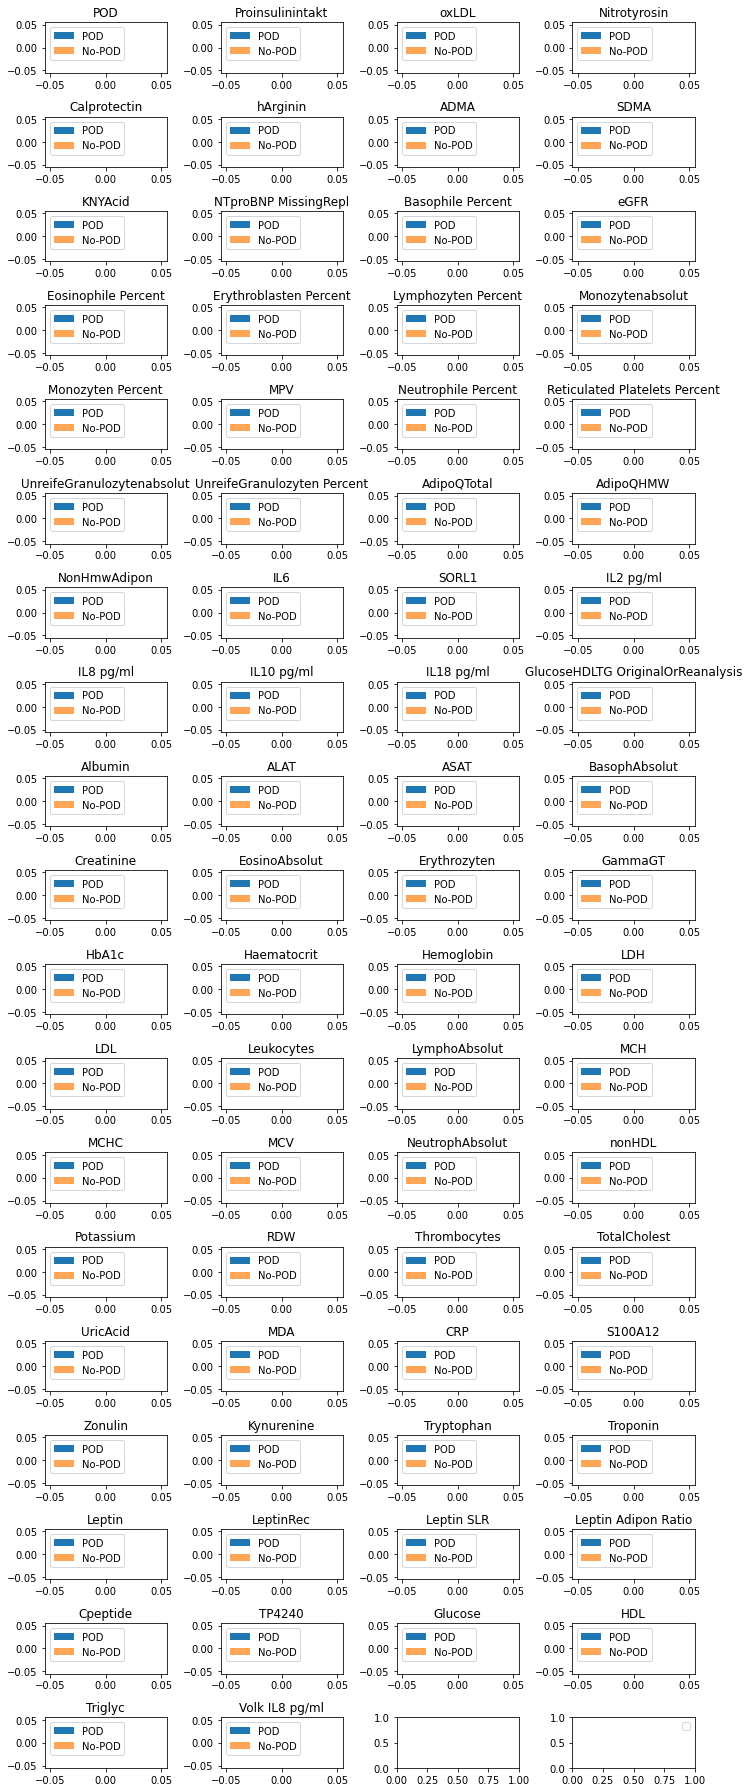

<Figure size 1440x1440 with 0 Axes>

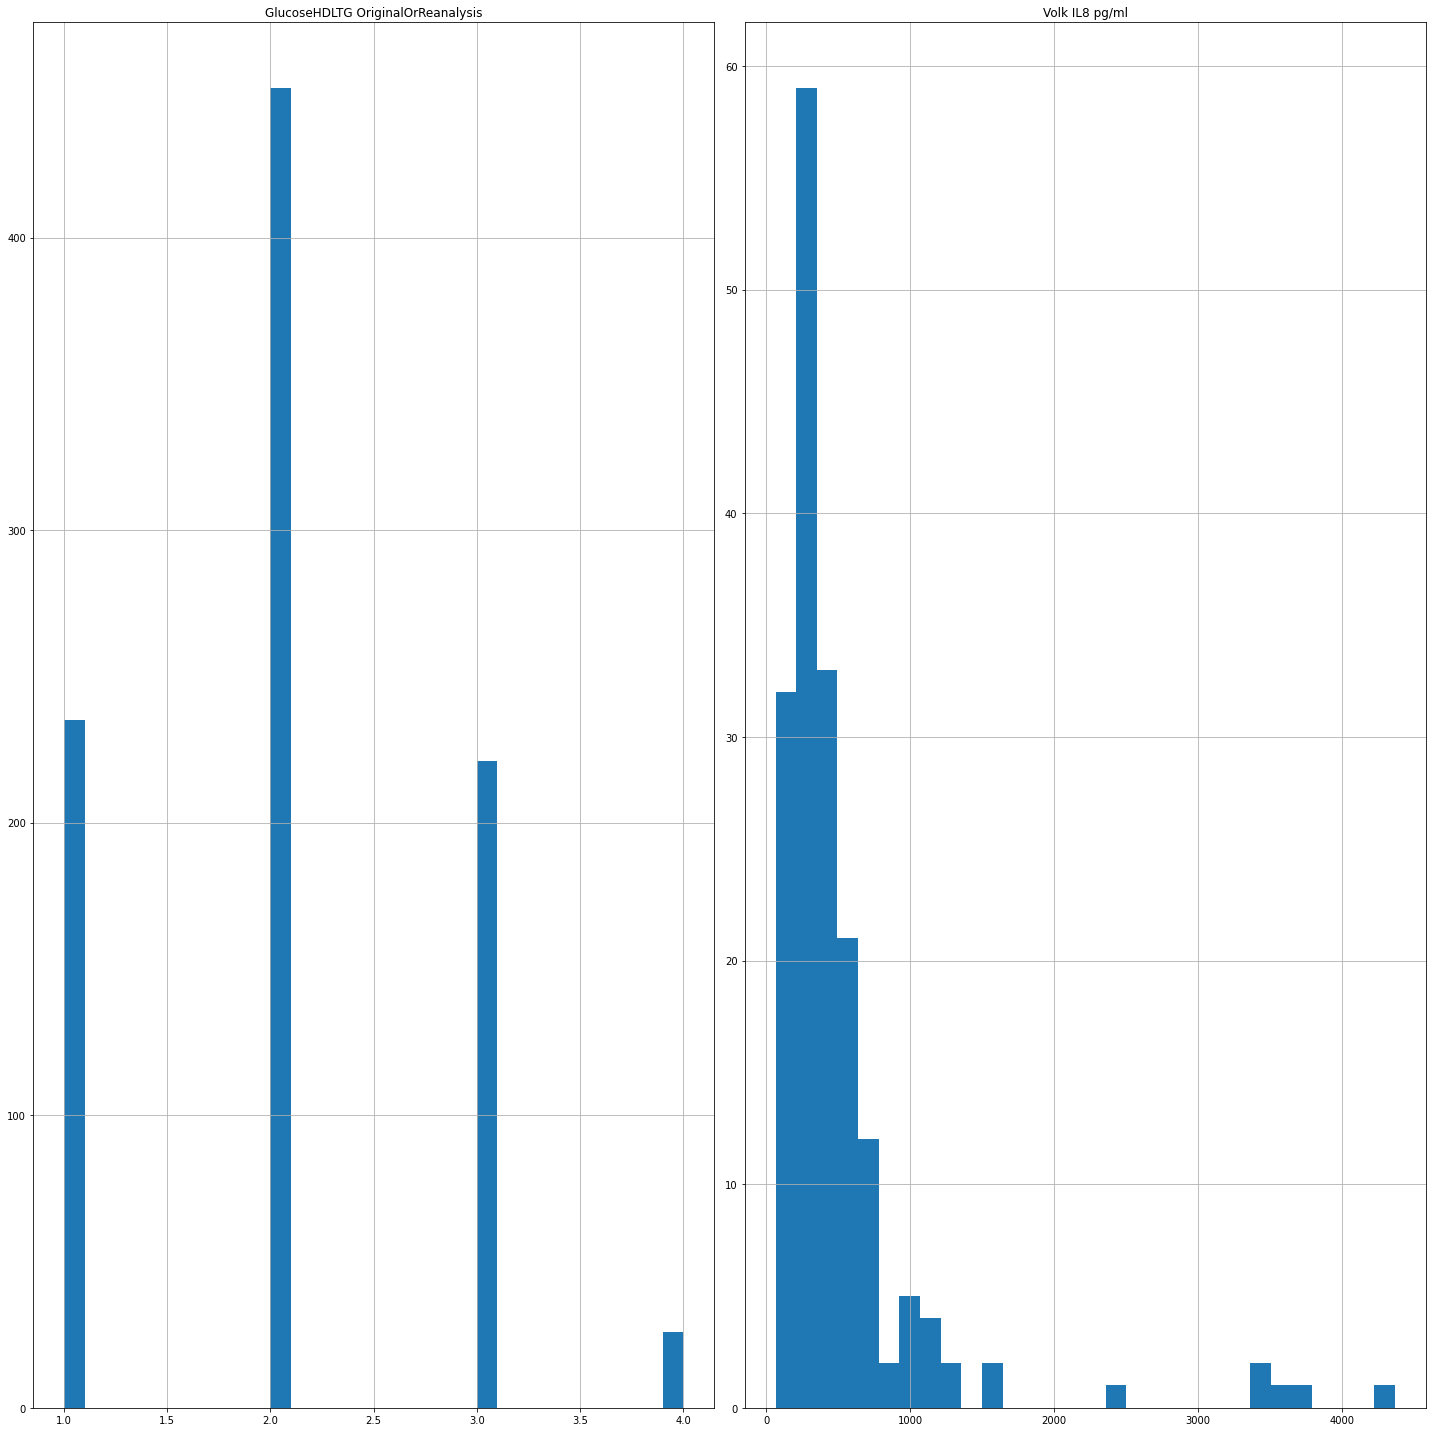

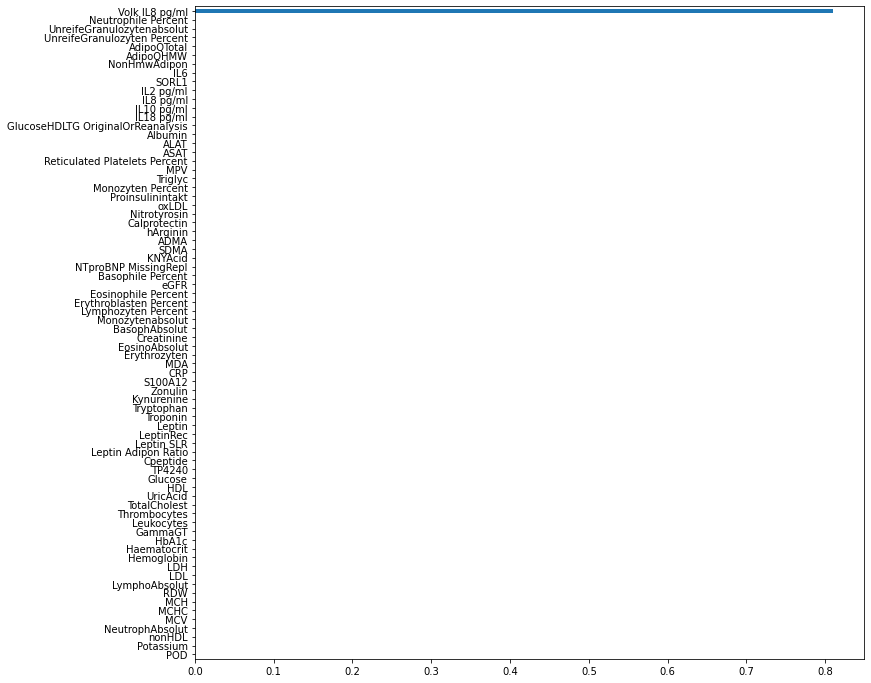

In [4]:
blood_df = load_blood_data("data", None)

In [5]:
sparse_img_df = load_sparse_imaging_data("data", None)

WARNING *** file size (64664) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Index(['Brain vol.', 'NBM vol.', 'Hippocampus vol.'], dtype='object')


In [29]:
import pandas as pd

merged_df = pd.concat([blood_df, clinical_df, sparse_img_df, precipitant_df], axis=1)
merged_df = merged_df.dropna(subset=["POD"])

In [30]:
# kick parameter that tells how one val was measured
merged_df = merged_df.drop(columns=["blood_GlucoseHDLTG OriginalOrReanalysis"])

In [32]:
# save merged dfa
merged_df.to_csv("data/merged_df.csv", index=False)

In [8]:
nans_per_pat = merged_df.isna().sum(axis=1) 
merged_df[nans_per_pat > 75]
# most pats have at least 25 non nans

,blood_Proinsulin,blood_Oxidized LDL,blood_Nitrotyrosin,blood_Calprotectin,blood_Homoarginin,blood_ADMA,blood_SDMA,blood_KNYAcid,blood_NT-proBNP,blood_Basophils fraction,...,clinical_GDS score,clinical_CCI,clinical_Tumor*,clinical_EQ5D,clinical_Intracranial surgery,"clinical_Intrathoric, abdominal or pelvic surgery",clinical_Peripheral surgery,sparse_img_Brain vol.,sparse_img_NBM vol.,sparse_img_Hippocampus vol.
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,1.0,0.887,0.0,0.0,1.0,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,1.000,0.0,1.0,0.0,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,0.0,0.0,1.0,923.067,1667.0,2941.95


In [9]:
merged_df

,blood_Proinsulin,blood_Oxidized LDL,blood_Nitrotyrosin,blood_Calprotectin,blood_Homoarginin,blood_ADMA,blood_SDMA,blood_KNYAcid,blood_NT-proBNP,blood_Basophils fraction,...,clinical_GDS score,clinical_CCI,clinical_Tumor*,clinical_EQ5D,clinical_Intracranial surgery,"clinical_Intrathoric, abdominal or pelvic surgery",clinical_Peripheral surgery,sparse_img_Brain vol.,sparse_img_NBM vol.,sparse_img_Hippocampus vol.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,0.0,1107.945,1795.0,3943.25
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00,0.0,0.0,NaN,0.0,1.0,0.0,841.060,1470.0,2824.80
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,1.0,0.0,NaN,0.0,1.0,0.0,906.230,1749.0,3306.95
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00,1.0,0.0,NaN,0.0,1.0,0.0,992.390,1722.0,4155.90
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,0.0,0.0,NaN,0.0,0.0,1.0,1132.511,1875.0,4517.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,...,0.00,0.0,0.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN
929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,...,1.25,1.0,0.0,0.828,0.0,0.0,1.0,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,...,0.00,1.0,0.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,...,2.00,0.0,0.0,0.999,0.0,0.0,1.0,NaN,NaN,NaN


In [10]:
nans_per_feat = merged_df.isna().sum(axis=0)
nans_per_feat.sort_values(ascending=False)

blood_IL10                                 874
blood_eGFR                                 808
blood_Reticulated platelet fraction        793
blood_IL8                                  751
blood_IL8, EDTA                            751
                                          ... 
blood_GlucoseHDLTG OriginalOrReanalysis      0
Sex                                          0
Height                                       0
Age                                          0
clinical_ASA-PS                              0
Length: 108, dtype: int64

In [11]:
merged_df.corr()["POD"].abs().sort_values(ascending=False)

POD                                                  1.000000
clinical_Intrathoric, abdominal or pelvic surgery    0.211680
clinical_Peripheral surgery                          0.211323
clinical_Frailty (3 levels)                          0.200808
clinical_ASA-PS                                      0.184751
                                                       ...   
blood_BasophAbsolut                                  0.004425
clinical_History of previous surgery                 0.002065
blood_IL18                                           0.002022
blood_Eosinophils fraction                           0.001308
clinical_Intracranial surgery                        0.000931
Name: POD, Length: 108, dtype: float64

/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.8/dist-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.5355555555555556


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


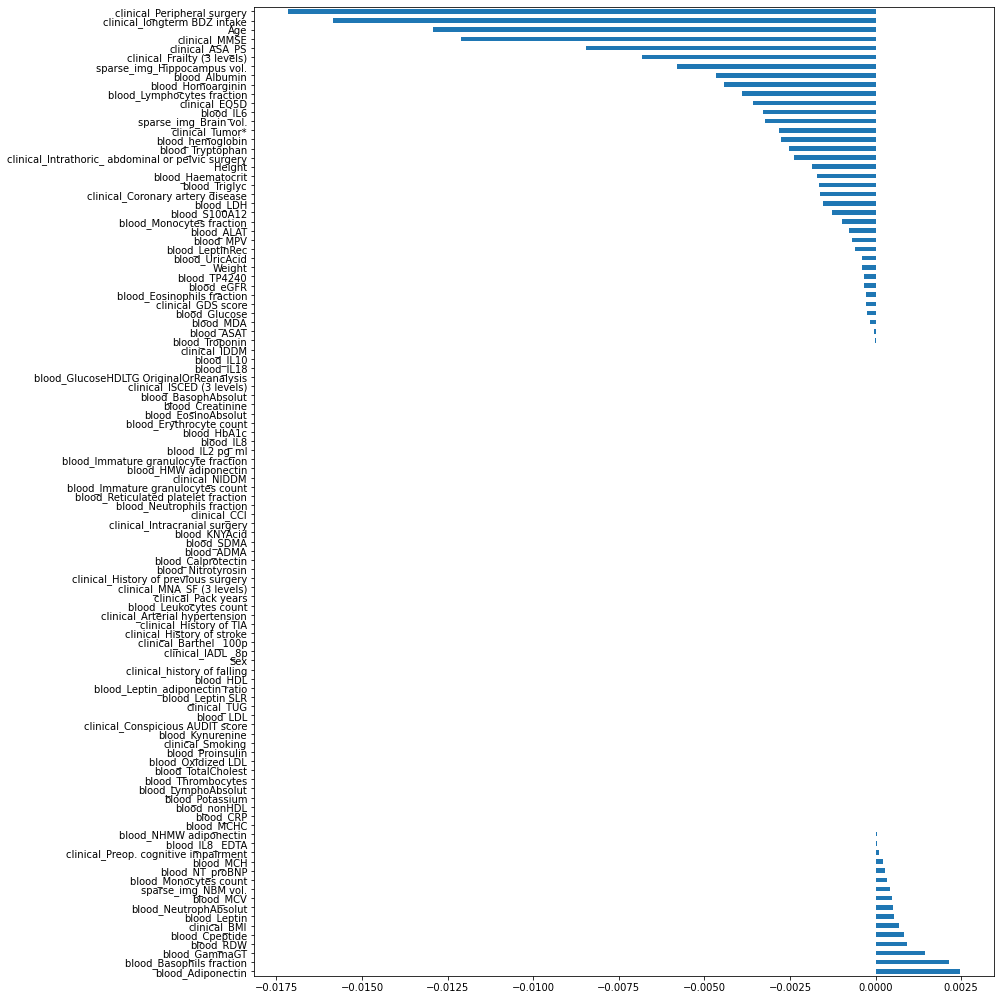

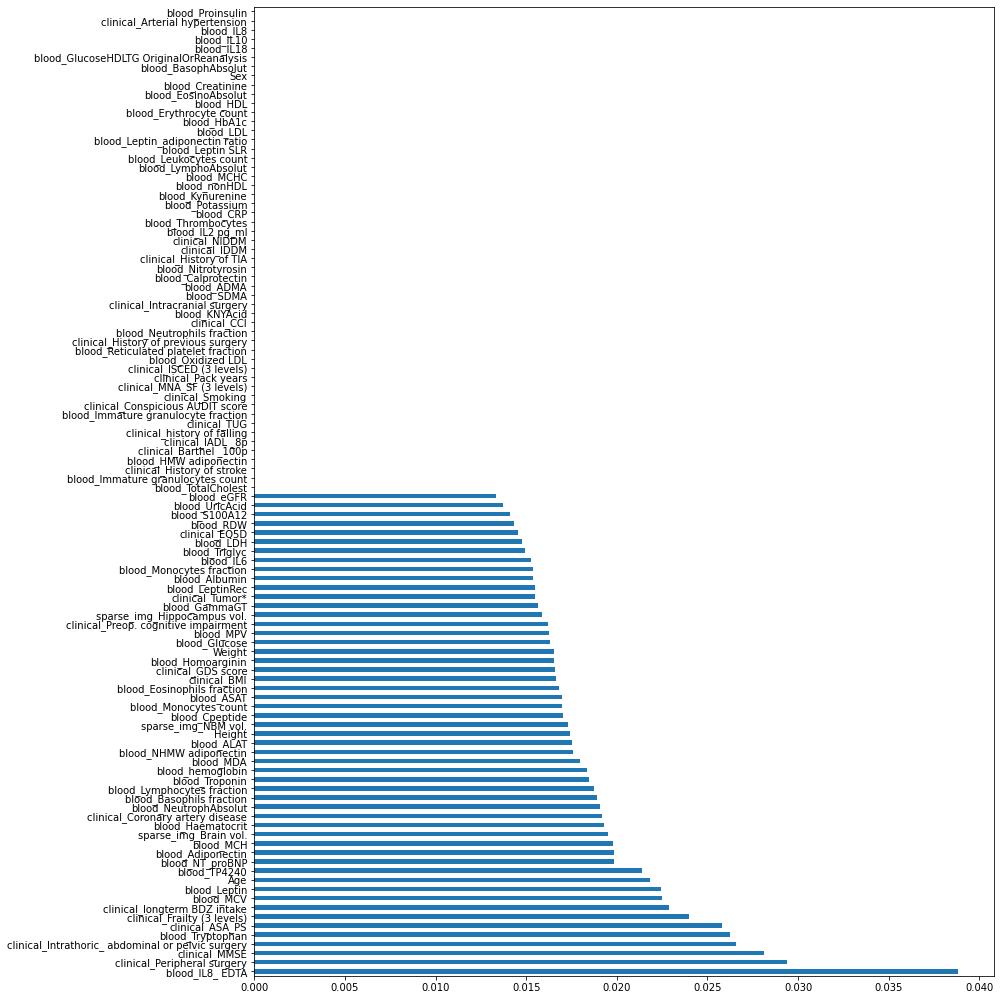

In [12]:
# make copy of merged_df and remove all special characters from column names
merged_df_copy = merged_df.copy().drop(columns=["POCD"])
merged_df_copy.columns = [col.replace(",", "_").replace("-", "_").replace("/", "_").replace("<", "_") for col in merged_df_copy.columns]


# do train test split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(merged_df_copy, test_size=0.1, random_state=42, stratify=merged_df_copy["POD"])

# fill nans with median
train_median = train_df.median(axis=0)
train_df = train_df.fillna(train_median)
test_df = test_df.fillna(train_median)

# split in input and target
train_x, train_y = train_df.drop(columns=["POD"]), train_df["POD"]
test_x, test_y = test_df.drop(columns=["POD"]), test_df["POD"]

# train xgboost model on train set
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1, subsample=0.99, colsample_bytree=0.8, gamma=5.0, 
                    eval_metric="auc", random_state=42, use_label_encoder=False, tree_method="gpu_hist")

# train logistic regression with good regularization
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(C=8, solver="liblinear", random_state=42)

clf.fit(train_x, train_y)
test_preds = clf.predict(test_x)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y, test_preds)

print(auc)

# get shap values
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(train_df.drop(columns=["POD"]))
mean_shap_values = shap_values.mean(axis=0)
shap_df = pd.Series(mean_shap_values, index=train_df.drop(columns=["POD"]).columns.to_list())
#print(shap_df.abs().sort_values(ascending=False).iloc[:20])
shap_df.sort_values(ascending=False).plot(kind="barh", figsize=(14, 14))
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

# get feat importance
importance = clf.feature_importances_
importance_df = pd.Series(importance, index=train_df.drop(columns=["POD"]).columns.to_list())
#({"feature": train_df.drop(columns=["POD"]).columns, "importance": importance})
#importance_df.sort_values(by="importance", ascending=False).iloc[:20]
importance_df.sort_values(ascending=False).plot(kind="barh", figsize=(14, 14))
plt.tight_layout()
plt.show()

In [13]:
print(shap_df.abs().sort_values(ascending=False).iloc[-20:])
importance_df.sort_values(by="importance", ascending=False).iloc[-20:]

blood_nonHDL                               0.0
blood_Potassium                            0.0
blood_Thrombocytes                         0.0
blood_TotalCholest                         0.0
blood_Oxidized LDL                         0.0
blood_GlucoseHDLTG OriginalOrReanalysis    0.0
blood_Reticulated platelet fraction        0.0
blood_Kynurenine                           0.0
blood_IL18                                 0.0
blood_IL10                                 0.0
blood_IL8                                  0.0
blood_Leptin SLR                           0.0
blood_Leptin_adiponectin ratio             0.0
blood_IL2 pg_ml                            0.0
blood_HDL                                  0.0
Sex                                        0.0
blood_HMW adiponectin                      0.0
blood_Erythrocyte count                    0.0
blood_Immature granulocytes count          0.0
blood_Proinsulin                           0.0
dtype: float32


TypeError: sort_values() got an unexpected keyword argument 'by'

<AxesSubplot:>

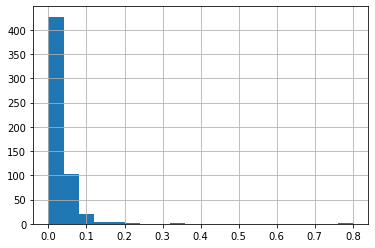

In [22]:
merged_df["blood_Immature granulocytes count"].hist(bins=20)

In [20]:
print(blood_cols)

['blood_Proinsulin', 'blood_Oxidized LDL', 'blood_Nitrotyrosin', 'blood_Calprotectin', 'blood_Homoarginin', 'blood_ADMA', 'blood_SDMA', 'blood_KNYAcid', 'blood_NT-proBNP', 'blood_Basophils fraction', 'blood_eGFR', 'blood_Eosinophils fraction', 'blood_Lymphocytes fraction', 'blood_Monocytes count', 'blood_Monocytes fraction', 'blood_MPV', 'blood_Neutrophils fraction', 'blood_Reticulated platelet fraction', 'blood_Immature granulocytes count', 'blood_Immature granulocyte fraction', 'blood_Adiponectin', 'blood_HMW adiponectin', 'blood_NHMW adiponectin', 'blood_IL6', 'blood_IL2 pg/ml', 'blood_IL8', 'blood_IL10', 'blood_IL18', 'blood_GlucoseHDLTG OriginalOrReanalysis', 'blood_Albumin', 'blood_ALAT', 'blood_ASAT', 'blood_BasophAbsolut', 'blood_Creatinine', 'blood_EosinoAbsolut', 'blood_Erythrocyte count', 'blood_GammaGT', 'blood_HbA1c', 'blood_Haematocrit', 'blood_hemoglobin', 'blood_LDH', 'blood_LDL', 'blood_Leukocytes count', 'blood_LymphoAbsolut', 'blood_MCH', 'blood_MCHC', 'blood_MCV', '

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.


<Figure size 1008x1008 with 0 Axes>

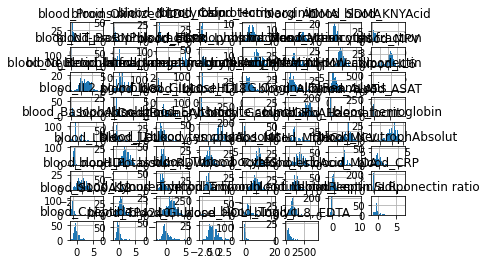

In [19]:
list(merged_df.columns)
# only select columns that start with _blood
blood_cols = [col for col in merged_df.columns if col.startswith("blood_")]

plt.figure(figsize=(14, 14))
merged_df[blood_cols].hist(bins=100)
plt.tight_layout()
plt.show()

In [ ]:
from src.preprocess_utils.missing_utils import drop_empty_target
